## 딥러닝 기초 이론 
 1. 선형회귀 모델
 2. 로지스틱 회귀모델
 3. 퍼셉트론, 다층 퍼셉트론
 4. 오차 역전파, 활성화 함수, 경사하강법

###### 출처:더북(https://thebook.io/), 모두의 딥러닝 개정 3판

### 1.선형 회귀 모델 
: 선형 회귀란 독립 변수 x를 사용해 종속 변수 y의 움직임을 예측하고 설명하는 작업
#### - 최소 제곱법(method of least squares)

![fx-44](딥러닝/fx-44.jpg)

: 선형회귀 y = ax + b 에서 기울기 a 값 구하기
<br><br><br>
![2](딥러닝/2.jpg)

:선형회귀 y = ax + b 에서 y절편 b 구하기 

#### 선형회귀 예시 : 공부 시간과 점수
#### : 최소제곱법으로 기울기와 y 절편 구하기

In [4]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
import numpy as np
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [10]:
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값: ", mx)
print("y의 평균값: ", my)

x의 평균값:  5.0
y의 평균값:  90.5


In [6]:
## 선형회귀 y = ax + b 에서의 기울기 a 구하는 공식
## 분모 구하기 
divisor = sum([(i-mx)**2 for i in x])


In [14]:
## 선형회귀 y = ax + b 에서의 기울기 a 구하는 공식
## 분자 구하기 
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

In [15]:
print("분모: ", divisor)
print("분자: ", dividend)

분모:  20.0
분자:  46.0


In [16]:
## 선형회귀 y = ax + b 에서의 기울기 a 구하는 공식
## 기울기 a 값 구하기
a = dividend / divisor

In [17]:
## 선형회귀 y = ax + b 에서의 기울기 a 구하는 공식
## y 절편 b 값 구하기
b = my - (mx*a)

In [18]:
print("기울기 a = ", a)
print("y 절편 b = ", b)

기울기 a =  2.3
y 절편 b =  79.0


#### - 평균 제곱 오차(Mean Square Error , MSE)
: 임의의 값을 대입하여 수정하며 찾아가기 위해서 
주어진 선의 오차를 평가하기 위해 사용하는 방법,<br>
오차의 제곱값의 합을 n 으로 나눈다

![2](딥러닝/3.jpg)

- 오차 확인 위해서 임의의 직선과 실제 값 사이 거리 측정
- 그래프의 기울기가 잘못되었을 경우 오차의 합도 증가
- 오차 = 실제값 - 예측값
##### ** 제곱을 사용하는 이유 오차값이 음수도 존재 하므로 

#### 선형회귀 예시 : 공부 시간과 점수
#### : 평균제곱오차
![8](딥러닝/8.jpg)

In [20]:
# 임의로 기울기 a 값과 y 절편 b 값을 지정해
# x 에따른 예측값 y'와 실제값 y를 출력한다 
fake_a = 3
fake_b = 76

def predict(x):
    return fake_a * x + fake_b

predict_result = []
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f"
          % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [22]:
# 평균 제곱 오차 
n = len(x)  
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y, predict_result)))

평균 제곱 오차: 11.0


#### 선형회귀 예시 : 공부 시간과 점수
#### : 경사하강법(gradient decent)

![4](딥러닝/4.jpg)
: 기울기 a 와 오차 사이에는 이차함수의 관계<br>
  기울기 a가 m의 위치에 있을때 오차가 가장작다 <br>
  a1 -> m으로 이동하면서 최적의 기울기m을 찾는다 = 미분값이 0<br>
- 1. a1에서 미분을 구한다.

- 2. 구한 기울기의 반대 방향(기울기가 +면 음의 방향, -면 양의 방향)으로 얼마간 이동시킨 a2에서 미분을 구한다(그림 5-3 참조).

- 3. 앞에서 구한 미분 값이 0이 아니면 1과 2 과정을 반복한다.

> 경사 하강법은 오차의 변화에 따라 이차 함수 그래프를 만들고 적절한 학습률을 설정해 미분 값이 0인 지점을 구하는 것

![5](딥러닝/5.jpg)
: 기울기 a 를 변화 시켜서 m 값을 찾아내는 방법 
![6](딥러닝/6.jpg)
: 학습률을 너무 크게 잡으면 한 점으로 수렴하지 않고 발산

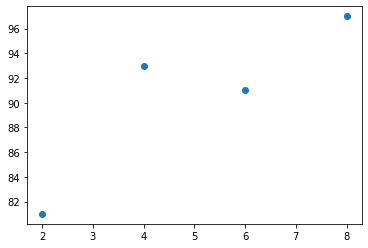

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000


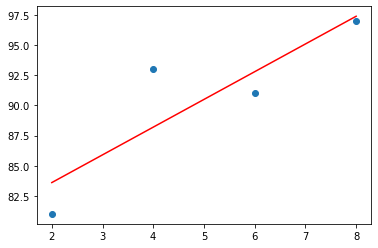

In [27]:
import matplotlib.pyplot as plt

# 공부 시간 X와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다. 2000번 까지 실행위해 2001 로 값을 준다 
epochs = 2001

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):      # 에포크 수만큼 반복합니다.
    y_pred = a * x + b       # 예측 값을 구하는 식입니다.
    error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:      # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

- 기울기 a의 값이 2.3에 수렴하는 것과 y 절편 b의 값이 79에 수렴,<br> 우리가 최소 제곱법을 이용해 미리 확인한 값과 동일 

- 학습률 0.03 (learning rate) 임의 설정, <br>

여러 학습률을 적용해 보며 최적의 결과를 만드는 학습률을 찾아낸 것입니다. 최적의 학습률은 데이터와 딥러닝 모델에 따라 다르므로 그때그때 찾아내야 합니다. 앞으로 배우게 될 딥러닝 프로젝트에서는 자동으로 최적의 학습률을 찾아 주는 최적화 알고리즘들을 사용합니다.

#### 다중선형 회귀
<img src = 'https://thebook.io/img/080324/fx-51.jpg' width= 300 height=200></img>

#### 다중선형 회귀 예시 : 공부시간, 과외시간, 성적

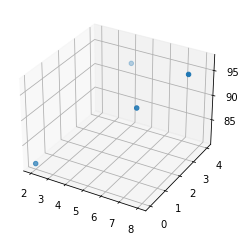

In [30]:
# 독립변수 2개, 종속변수 1개
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y);
plt.show()

![7](딥러닝/7.jpg)
: 2차원에서 선형회귀는 선을 그리는 작업, 3차원이 되면 평면을 그리는 작업

In [31]:
# 기울기 a의 값과 절편 b의 값을 초기화합니다.
# 독립변수 2개 이므로 기울기 값도 2개 
a1 = 0
a2 = 0
b = 0

# 학습률을 정합니다.
lr = 0.01 

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n = len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):             # 에포크 수만큼 반복합니다.
    
    y_pred = a1 * x1 + a2 * x2 + b  # 예측 값을 구하는 식을 세웁니다.
    error = y - y_pred              # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error))  # 오차 함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error))  # 오차 함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))        # 오차 함수를 b로 편미분한 값입니다.
    
    a1 = a1 - lr * a1_diff      # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff      # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff         # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:   # 100번 반복될 때마다 현재의 a1, a2, b의 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))


epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [32]:
print("실제 점수: ", y)
print("예측 점수: ", y_pred)

실제 점수:  [81 93 91 97]
예측 점수:  [80.76387645 92.97153922 91.42520875 96.7558749 ]


#### 텐서플로에서 선형회귀, 다중 선형회귀

머신러닝에서 사용하는 용어 <br>
- 가정하는 식을 머신 러닝에서는 가설 함수(hypothesis)라고 하며 H(x)라고 표기 <br>
- 기울기 a는 가중치(weight), w로 표기 <br>
- 절편 b는 편향(bias)이라고 하며, b로 표시
- 평균 제곱 오차 ➡︎ 손실 함수(loss function)
- 경사 하강법 ➡︎ 옵티마이저(optimizer)

#### y = ax + b ➡︎ H(x) = wx + b

In [37]:
! pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl

In [40]:
# 독립변수 1개 종속변수 1개
# 단순 선형 회귀 텐서플로
model = Sequential()
model.add(Dense(1,input_dim=1,activation='linear'))
model.compile(optimizer='sgd',loss='mse')
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 508ms/step - loss: 7165.8428
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 1888.9626
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 1108.5509
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 988.5923
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 965.6722
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 957.0392
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 950.5385
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 944.3851
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 938.3162
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 932.2931
Epoch 11/2000
1/1 [==============================] - 0s 3ms/step - loss: 926.3101
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 920.3660
Epoch 13/2000
1/1 [=

Epoch 101/2000
1/1 [==============================] - 0s 3ms/step - loss: 519.9096
Epoch 102/2000
1/1 [==============================] - 0s 3ms/step - loss: 516.5968
Epoch 103/2000
1/1 [==============================] - 0s 2ms/step - loss: 513.3057
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 510.0357
Epoch 105/2000
1/1 [==============================] - 0s 3ms/step - loss: 506.7870
Epoch 106/2000
1/1 [==============================] - 0s 3ms/step - loss: 503.5593
Epoch 107/2000
1/1 [==============================] - 0s 2ms/step - loss: 500.3524
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 497.1664
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 494.0010
Epoch 110/2000
1/1 [==============================] - 0s 3ms/step - loss: 490.8561
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 487.7316
Epoch 112/2000
1/1 [==============================] - 0s 3ms/step - loss: 484.6272
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 278.9825
Epoch 200/2000
1/1 [==============================] - 0s 3ms/step - loss: 277.2299
Epoch 201/2000
1/1 [==============================] - 0s 2ms/step - loss: 275.4885
Epoch 202/2000
1/1 [==============================] - 0s 3ms/step - loss: 273.7585
Epoch 203/2000
1/1 [==============================] - 0s 2ms/step - loss: 272.0396
Epoch 204/2000
1/1 [==============================] - 0s 3ms/step - loss: 270.3319
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 268.6352
Epoch 206/2000
1/1 [==============================] - 0s 2ms/step - loss: 266.9496
Epoch 207/2000
1/1 [==============================] - 0s 2ms/step - loss: 265.2748
Epoch 208/2000
1/1 [==============================] - 0s 3ms/step - loss: 263.6110
Epoch 209/2000
1/1 [==============================] - 0s 3ms/step - loss: 261.9578
Epoch 210/2000
1/1 [==============================] - 0s 3ms/step - loss: 260.3153
Epoch 211/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 151.5127
Epoch 298/2000
1/1 [==============================] - 0s 4ms/step - loss: 150.5854
Epoch 299/2000
1/1 [==============================] - 0s 3ms/step - loss: 149.6641
Epoch 300/2000
1/1 [==============================] - 0s 2ms/step - loss: 148.7488
Epoch 301/2000
1/1 [==============================] - 0s 3ms/step - loss: 147.8394
Epoch 302/2000
1/1 [==============================] - 0s 3ms/step - loss: 146.9358
Epoch 303/2000
1/1 [==============================] - 0s 3ms/step - loss: 146.0382
Epoch 304/2000
1/1 [==============================] - 0s 2ms/step - loss: 145.1463
Epoch 305/2000
1/1 [==============================] - 0s 2ms/step - loss: 144.2602
Epoch 306/2000
1/1 [==============================] - 0s 3ms/step - loss: 143.3799
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 142.5052
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 141.6362
Epoch 309/2000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 83.5804
Epoch 397/2000
1/1 [==============================] - 0s 2ms/step - loss: 83.0930
Epoch 398/2000
1/1 [==============================] - 0s 3ms/step - loss: 82.6087
Epoch 399/2000
1/1 [==============================] - 0s 3ms/step - loss: 82.1275
Epoch 400/2000
1/1 [==============================] - 0s 3ms/step - loss: 81.6495
Epoch 401/2000
1/1 [==============================] - 0s 3ms/step - loss: 81.1745
Epoch 402/2000
1/1 [==============================] - 0s 3ms/step - loss: 80.7027
Epoch 403/2000
1/1 [==============================] - 0s 2ms/step - loss: 80.2339
Epoch 404/2000
1/1 [==============================] - 0s 3ms/step - loss: 79.7681
Epoch 405/2000
1/1 [==============================] - 0s 3ms/step - loss: 79.3054
Epoch 406/2000
1/1 [==============================] - 0s 4ms/step - loss: 78.8456
Epoch 407/2000
1/1 [==============================] - 0s 3ms/step - loss: 78.3888
Epoch 408/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 47.6152
Epoch 497/2000
1/1 [==============================] - 0s 3ms/step - loss: 47.3607
Epoch 498/2000
1/1 [==============================] - 0s 3ms/step - loss: 47.1078
Epoch 499/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.8565
Epoch 500/2000
1/1 [==============================] - 0s 2ms/step - loss: 46.6069
Epoch 501/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.3588
Epoch 502/2000
1/1 [==============================] - 0s 3ms/step - loss: 46.1124
Epoch 503/2000
1/1 [==============================] - 0s 2ms/step - loss: 45.8676
Epoch 504/2000
1/1 [==============================] - 0s 2ms/step - loss: 45.6243
Epoch 505/2000
1/1 [==============================] - 0s 3ms/step - loss: 45.3826
Epoch 506/2000
1/1 [==============================] - 0s 4ms/step - loss: 45.1425
Epoch 507/2000
1/1 [==============================] - 0s 2ms/step - loss: 44.9040
Epoch 508/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 28.8325
Epoch 597/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.6996
Epoch 598/2000
1/1 [==============================] - 0s 11ms/step - loss: 28.5675
Epoch 599/2000
1/1 [==============================] - 0s 7ms/step - loss: 28.4363
Epoch 600/2000
1/1 [==============================] - 0s 5ms/step - loss: 28.3059
Epoch 601/2000
1/1 [==============================] - 0s 6ms/step - loss: 28.1763
Epoch 602/2000
1/1 [==============================] - 0s 3ms/step - loss: 28.0476
Epoch 603/2000
1/1 [==============================] - 0s 4ms/step - loss: 27.9198
Epoch 604/2000
1/1 [==============================] - 0s 3ms/step - loss: 27.7928
Epoch 605/2000
1/1 [==============================] - 0s 4ms/step - loss: 27.6665
Epoch 606/2000
1/1 [==============================] - 0s 4ms/step - loss: 27.5411
Epoch 607/2000
1/1 [==============================] - 0s 10ms/step - loss: 27.4166
Epoch 608/2000
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 19.0232
Epoch 697/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.9537
Epoch 698/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.8848
Epoch 699/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.8162
Epoch 700/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.7481
Epoch 701/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.6805
Epoch 702/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.6133
Epoch 703/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.5465
Epoch 704/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.4802
Epoch 705/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.4142
Epoch 706/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.3487
Epoch 707/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.2837
Epoch 708/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 13.9002
Epoch 797/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.8639
Epoch 798/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.8279
Epoch 799/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.7921
Epoch 800/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.7565
Epoch 801/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.7212
Epoch 802/2000
1/1 [==============================] - 0s 4ms/step - loss: 13.6861
Epoch 803/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.6512
Epoch 804/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.6166
Epoch 805/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.5822
Epoch 806/2000
1/1 [==============================] - 0s 4ms/step - loss: 13.5479
Epoch 807/2000
1/1 [==============================] - 0s 3ms/step - loss: 13.5140
Epoch 808/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 11.2247
Epoch 897/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.2058
Epoch 898/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.1870
Epoch 899/2000
1/1 [==============================] - 0s 7ms/step - loss: 11.1682
Epoch 900/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.1497
Epoch 901/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.1312
Epoch 902/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.1129
Epoch 903/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.0947
Epoch 904/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0766
Epoch 905/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0586
Epoch 906/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0408
Epoch 907/2000
1/1 [==============================] - 0s 4ms/step - loss: 11.0230
Epoch 908/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 9.8274
Epoch 997/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.8176
Epoch 998/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.8077
Epoch 999/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7980
Epoch 1000/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7883
Epoch 1001/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.7786
Epoch 1002/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7691
Epoch 1003/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7595
Epoch 1004/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.7501
Epoch 1005/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.7407
Epoch 1006/2000
1/1 [==============================] - 0s 5ms/step - loss: 9.7314
Epoch 1007/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.7221
Epoch 1008/2000
1/1 [==============

1/1 [==============================] - 0s 3ms/step - loss: 9.0977
Epoch 1097/2000
1/1 [==============================] - 0s 5ms/step - loss: 9.0926
Epoch 1098/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0874
Epoch 1099/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0823
Epoch 1100/2000
1/1 [==============================] - 0s 5ms/step - loss: 9.0773
Epoch 1101/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0722
Epoch 1102/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0672
Epoch 1103/2000
1/1 [==============================] - 0s 5ms/step - loss: 9.0623
Epoch 1104/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0573
Epoch 1105/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0524
Epoch 1106/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.0475
Epoch 1107/2000
1/1 [==============================] - 0s 3ms/step - loss: 9.0427
Epoch 1108/2000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 8.7166
Epoch 1197/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7139
Epoch 1198/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.7112
Epoch 1199/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.7085
Epoch 1200/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7059
Epoch 1201/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.7033
Epoch 1202/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.7007
Epoch 1203/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6981
Epoch 1204/2000
1/1 [==============================] - 0s 8ms/step - loss: 8.6955
Epoch 1205/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6930
Epoch 1206/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.6904
Epoch 1207/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.6879
Epoch 1208/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.5175
Epoch 1297/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5161
Epoch 1298/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5147
Epoch 1299/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5133
Epoch 1300/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5120
Epoch 1301/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5106
Epoch 1302/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5092
Epoch 1303/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.5079
Epoch 1304/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5065
Epoch 1305/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5052
Epoch 1306/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.5039
Epoch 1307/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.5026
Epoch 1308/2000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 8.4136
Epoch 1397/2000
1/1 [==============================] - 0s 5ms/step - loss: 8.4129
Epoch 1398/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4121
Epoch 1399/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.4114
Epoch 1400/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4107
Epoch 1401/2000
1/1 [==============================] - 0s 5ms/step - loss: 8.4100
Epoch 1402/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.4093
Epoch 1403/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4086
Epoch 1404/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.4079
Epoch 1405/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.4072
Epoch 1406/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.4065
Epoch 1407/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.4058
Epoch 1408/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 8.3594
Epoch 1497/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3590
Epoch 1498/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3586
Epoch 1499/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3582
Epoch 1500/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3578
Epoch 1501/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3574
Epoch 1502/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3571
Epoch 1503/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3567
Epoch 1504/2000
1/1 [==============================] - 0s 5ms/step - loss: 8.3563
Epoch 1505/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3560
Epoch 1506/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3556
Epoch 1507/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3553
Epoch 1508/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3310
Epoch 1597/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3308
Epoch 1598/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3306
Epoch 1599/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3304
Epoch 1600/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3302
Epoch 1601/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3300
Epoch 1602/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3298
Epoch 1603/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3296
Epoch 1604/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3294
Epoch 1605/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3292
Epoch 1606/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3290
Epoch 1607/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3289
Epoch 1608/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 8.3162
Epoch 1697/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3161
Epoch 1698/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3160
Epoch 1699/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3159
Epoch 1700/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3158
Epoch 1701/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3157
Epoch 1702/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3156
Epoch 1703/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3155
Epoch 1704/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3154
Epoch 1705/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3153
Epoch 1706/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3152
Epoch 1707/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3151
Epoch 1708/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3085
Epoch 1797/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3084
Epoch 1798/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3083
Epoch 1799/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3083
Epoch 1800/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3082
Epoch 1801/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3082
Epoch 1802/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3081
Epoch 1803/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3081
Epoch 1804/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3080
Epoch 1805/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3080
Epoch 1806/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3079
Epoch 1807/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3079
Epoch 1808/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 8.3044
Epoch 1897/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3044
Epoch 1898/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3044
Epoch 1899/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3043
Epoch 1900/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3043
Epoch 1901/2000
1/1 [==============================] - 0s 5ms/step - loss: 8.3043
Epoch 1902/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3042
Epoch 1903/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3042
Epoch 1904/2000
1/1 [==============================] - 0s 7ms/step - loss: 8.3042
Epoch 1905/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3042
Epoch 1906/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.3041
Epoch 1907/2000
1/1 [==============================] - 0s 6ms/step - loss: 8.3041
Epoch 1908/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 8.3023
Epoch 1997/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3023
Epoch 1998/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3023
Epoch 1999/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3023
Epoch 2000/2000
1/1 [==============================] - 0s 3ms/step - loss: 8.3023


## 위코드 설명 
#### 1. 가설 함수 :  H(x) = wx + b 
출력되는 값(=성적)이 하나, Dense() 함수의 첫 번째 인자에 1이라고 설정 
입력될 변수(=학습 시간)도 하나, input_dim 1이라고 설정
- 활성화 함수 <br>
:입력된 값을 다음 층으로 넘길 때 각 값을 어떻게 처리할지를 결정하는 함수,<br>activation은 활성화 함수를 정하는 옵션<br>여기에서는 선형 회귀를 다루고 있으므로 'linear'라고 설정 <br>
딥러닝 목적에 따라 다른 활성화 함수를 넣을 수있음, 
시그모이드 함수가 필요하다면 
‘sigmoid’입력  

#### 2. 경사 하강법을 실행하려면 옵티마이저에 sgd라고 설정 손실 함수는 평균 제곱 오차 사용, mse라고 설정
#### 3. epochs 숫자를 model.fit() 함수에 입력.

1/1 [==============================] - 0s 37ms/step


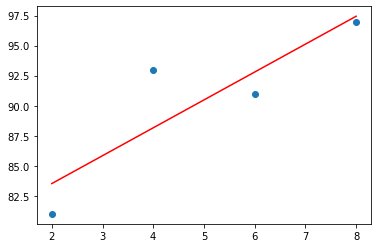

1/1 [==============================] - 0s 26ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다.


In [42]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다." % (hour, prediction))

In [43]:
# 다중 선형 회귀 
# 텐서 플로 
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

model = Sequential()

# 입력 변수가 두 개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다.
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs=2000)

# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다." % (hour, private_class, prediction))

Epoch 1/2000
1/1 [==============================] - 1s 540ms/step - loss: 6977.5952
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 1355.0552
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 954.1440
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 920.5036
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 912.7280
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 906.8059
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 901.0483
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 895.3365
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 889.6616
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 884.0229
Epoch 11/2000
1/1 [==============================] - 0s 2ms/step - loss: 878.4200
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 872.8529
Epoch 13/2000
1/1 [==

Epoch 101/2000
1/1 [==============================] - 0s 3ms/step - loss: 495.7936
Epoch 102/2000
1/1 [==============================] - 0s 2ms/step - loss: 492.6531
Epoch 103/2000
1/1 [==============================] - 0s 3ms/step - loss: 489.5327
Epoch 104/2000
1/1 [==============================] - 0s 3ms/step - loss: 486.4319
Epoch 105/2000
1/1 [==============================] - 0s 2ms/step - loss: 483.3509
Epoch 106/2000
1/1 [==============================] - 0s 2ms/step - loss: 480.2893
Epoch 107/2000
1/1 [==============================] - 0s 2ms/step - loss: 477.2472
Epoch 108/2000
1/1 [==============================] - 0s 3ms/step - loss: 474.2242
Epoch 109/2000
1/1 [==============================] - 0s 3ms/step - loss: 471.2204
Epoch 110/2000
1/1 [==============================] - 0s 2ms/step - loss: 468.2358
Epoch 111/2000
1/1 [==============================] - 0s 3ms/step - loss: 465.2700
Epoch 112/2000
1/1 [==============================] - 0s 2ms/step - loss: 462.3228
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 265.9963
Epoch 200/2000
1/1 [==============================] - 0s 3ms/step - loss: 264.3117
Epoch 201/2000
1/1 [==============================] - 0s 4ms/step - loss: 262.6378
Epoch 202/2000
1/1 [==============================] - 0s 3ms/step - loss: 260.9744
Epoch 203/2000
1/1 [==============================] - 0s 3ms/step - loss: 259.3216
Epoch 204/2000
1/1 [==============================] - 0s 3ms/step - loss: 257.6793
Epoch 205/2000
1/1 [==============================] - 0s 3ms/step - loss: 256.0474
Epoch 206/2000
1/1 [==============================] - 0s 3ms/step - loss: 254.4257
Epoch 207/2000
1/1 [==============================] - 0s 3ms/step - loss: 252.8144
Epoch 208/2000
1/1 [==============================] - 0s 3ms/step - loss: 251.2134
Epoch 209/2000
1/1 [==============================] - 0s 3ms/step - loss: 249.6223
Epoch 210/2000
1/1 [==============================] - 0s 3ms/step - loss: 248.0415
Epoch 211/2000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 142.7243
Epoch 298/2000
1/1 [==============================] - 0s 2ms/step - loss: 141.8206
Epoch 299/2000
1/1 [==============================] - 0s 3ms/step - loss: 140.9227
Epoch 300/2000
1/1 [==============================] - 0s 3ms/step - loss: 140.0304
Epoch 301/2000
1/1 [==============================] - 0s 2ms/step - loss: 139.1438
Epoch 302/2000
1/1 [==============================] - 0s 4ms/step - loss: 138.2627
Epoch 303/2000
1/1 [==============================] - 0s 2ms/step - loss: 137.3873
Epoch 304/2000
1/1 [==============================] - 0s 3ms/step - loss: 136.5174
Epoch 305/2000
1/1 [==============================] - 0s 2ms/step - loss: 135.6530
Epoch 306/2000
1/1 [==============================] - 0s 3ms/step - loss: 134.7941
Epoch 307/2000
1/1 [==============================] - 0s 2ms/step - loss: 133.9407
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 133.0926
Epoch 309/2000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 76.1115
Epoch 397/2000
1/1 [==============================] - 0s 4ms/step - loss: 75.6298
Epoch 398/2000
1/1 [==============================] - 0s 3ms/step - loss: 75.1511
Epoch 399/2000
1/1 [==============================] - 0s 3ms/step - loss: 74.6755
Epoch 400/2000
1/1 [==============================] - 0s 4ms/step - loss: 74.2029
Epoch 401/2000
1/1 [==============================] - 0s 3ms/step - loss: 73.7332
Epoch 402/2000
1/1 [==============================] - 0s 3ms/step - loss: 73.2666
Epoch 403/2000
1/1 [==============================] - 0s 3ms/step - loss: 72.8029
Epoch 404/2000
1/1 [==============================] - 0s 3ms/step - loss: 72.3421
Epoch 405/2000
1/1 [==============================] - 0s 3ms/step - loss: 71.8843
Epoch 406/2000
1/1 [==============================] - 0s 2ms/step - loss: 71.4294
Epoch 407/2000
1/1 [==============================] - 0s 2ms/step - loss: 70.9773
Epoch 408/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 40.3472
Epoch 497/2000
1/1 [==============================] - 0s 3ms/step - loss: 40.0921
Epoch 498/2000
1/1 [==============================] - 0s 2ms/step - loss: 39.8385
Epoch 499/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.5866
Epoch 500/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.3363
Epoch 501/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.0876
Epoch 502/2000
1/1 [==============================] - 0s 2ms/step - loss: 38.8404
Epoch 503/2000
1/1 [==============================] - 0s 4ms/step - loss: 38.5948
Epoch 504/2000
1/1 [==============================] - 0s 3ms/step - loss: 38.3508
Epoch 505/2000
1/1 [==============================] - 0s 2ms/step - loss: 38.1083
Epoch 506/2000
1/1 [==============================] - 0s 3ms/step - loss: 37.8673
Epoch 507/2000
1/1 [==============================] - 0s 3ms/step - loss: 37.6279
Epoch 508/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 21.4040
Epoch 597/2000
1/1 [==============================] - 0s 3ms/step - loss: 21.2689
Epoch 598/2000
1/1 [==============================] - 0s 2ms/step - loss: 21.1346
Epoch 599/2000
1/1 [==============================] - 0s 2ms/step - loss: 21.0011
Epoch 600/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.8686
Epoch 601/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.7368
Epoch 602/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.6059
Epoch 603/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.4758
Epoch 604/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.3466
Epoch 605/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.2181
Epoch 606/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.0905
Epoch 607/2000
1/1 [==============================] - 0s 2ms/step - loss: 19.9636
Epoch 608/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 11.3706
Epoch 697/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.2990
Epoch 698/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.2278
Epoch 699/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.1571
Epoch 700/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0869
Epoch 701/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.0171
Epoch 702/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.9478
Epoch 703/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.8789
Epoch 704/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.8104
Epoch 705/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.7424
Epoch 706/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.6748
Epoch 707/2000
1/1 [==============================] - 0s 3ms/step - loss: 10.6076
Epoch 708/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 6.0183
Epoch 798/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.9806
Epoch 799/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.9432
Epoch 800/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.9060
Epoch 801/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.8690
Epoch 802/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.8323
Epoch 803/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.7958
Epoch 804/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.7595
Epoch 805/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.7235
Epoch 806/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.6877
Epoch 807/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.6521
Epoch 808/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.6168
Epoch 809/2000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 3.2013
Epoch 899/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.1815
Epoch 900/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1618
Epoch 901/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1422
Epoch 902/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1227
Epoch 903/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1034
Epoch 904/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.0842
Epoch 905/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.0651
Epoch 906/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.0462
Epoch 907/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.0273
Epoch 908/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.0086
Epoch 909/2000
1/1 [==============================] - 0s 3ms/step - loss: 2.9900
Epoch 910/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 1.7187
Epoch 1000/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.7083
Epoch 1001/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6979
Epoch 1002/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6876
Epoch 1003/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6774
Epoch 1004/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.6672
Epoch 1005/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6571
Epoch 1006/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6471
Epoch 1007/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6371
Epoch 1008/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6272
Epoch 1009/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6173
Epoch 1010/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.6075
Epoch 1011/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.9439
Epoch 1100/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9384
Epoch 1101/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9329
Epoch 1102/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9275
Epoch 1103/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9220
Epoch 1104/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9166
Epoch 1105/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9113
Epoch 1106/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9060
Epoch 1107/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.9007
Epoch 1108/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.8954
Epoch 1109/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8902
Epoch 1110/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8850
Epoch 1111/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.5336
Epoch 1200/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5306
Epoch 1201/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5277
Epoch 1202/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5248
Epoch 1203/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5220
Epoch 1204/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5191
Epoch 1205/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5163
Epoch 1206/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5134
Epoch 1207/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5106
Epoch 1208/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5079
Epoch 1209/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5051
Epoch 1210/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5024
Epoch 1211/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.3162
Epoch 1300/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 1301/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3131
Epoch 1302/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3116
Epoch 1303/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3100
Epoch 1304/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.3085
Epoch 1305/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3070
Epoch 1306/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3055
Epoch 1307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3041
Epoch 1308/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3026
Epoch 1309/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3011
Epoch 1310/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2997
Epoch 1311/2000
1/1 [==========

1/1 [==============================] - 0s 3ms/step - loss: 0.2011
Epoch 1400/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2002
Epoch 1401/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1994
Epoch 1402/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1986
Epoch 1403/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1978
Epoch 1404/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1970
Epoch 1405/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1962
Epoch 1406/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 1407/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1946
Epoch 1408/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1939
Epoch 1409/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1931
Epoch 1410/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1923
Epoch 1411/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1401
Epoch 1500/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1397
Epoch 1501/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1392
Epoch 1502/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1388
Epoch 1503/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1384
Epoch 1504/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1379
Epoch 1505/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1375
Epoch 1506/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1371
Epoch 1507/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1367
Epoch 1508/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1363
Epoch 1509/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1359
Epoch 1510/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1355
Epoch 1511/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1078
Epoch 1600/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1076
Epoch 1601/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1073
Epoch 1602/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1071
Epoch 1603/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1069
Epoch 1604/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1067
Epoch 1605/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1064
Epoch 1606/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1062
Epoch 1607/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1060
Epoch 1608/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1058
Epoch 1609/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 1610/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1053
Epoch 1611/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0907
Epoch 1700/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0906
Epoch 1701/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0904
Epoch 1702/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0903
Epoch 1703/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0902
Epoch 1704/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0901
Epoch 1705/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 1706/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 1707/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0897
Epoch 1708/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 1709/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0895
Epoch 1710/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 1711/2000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0816
Epoch 1800/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0816
Epoch 1801/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 1802/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 1803/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 1804/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 1805/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0812
Epoch 1806/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0812
Epoch 1807/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 1808/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 1809/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 1810/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 1811/2000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0768
Epoch 1900/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0768
Epoch 1901/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0768
Epoch 1902/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0767
Epoch 1903/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 1904/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 1905/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0766
Epoch 1906/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 1907/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 1908/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 1909/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 1910/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 1911/2000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0743
Epoch 2000/2000
1/1 [==============================] - 0s 42ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다.


### 2. 로지스틱 회귀모델 : 참 거짓 판단

<img src = 'https://thebook.io/img/080324/100_2.jpg' width= 400 height=200></img>
: 합격과 불합격만 있을때 좌표표현<br>
  참(1)과 거짓(0) 사이를 구분하는 S자 형태의 선 작업

#### 시그모이드 함수

<img src = 'https://thebook.io/img/080324/fx-52.jpg' width=300 height=200></img>

<img src = 'https://thebook.io/img/080324/101.jpg' width= 400 height=200></img><br>
-  a 는 그래프의 경사도를 결정

<img src = 'https://thebook.io/img/080324/102_1.jpg' width= 400 height=200></img><br>
- b는 그래프 좌우 이동을 의미

<img src = 'https://thebook.io/img/080324/102_2.jpg' width= 400 height=200></img>
- a값에 따라 변화하는 오차를 그래프로 나타냄

<img src = 'https://thebook.io/img/080324/103.jpg' width= 500 height=200></img><br>
- b와 오차의 관계, b값이 너무 작아지거나 커지면 오차도 커진다

#### 오차공식
:시그모이드 함수의 특징은 y 값이 0과 1 사이 <br>
실제 값이 1일 때 예측 값이 0에 가까워지면 오차 증가.<br> 
실제 값이 0일 때 예측 값이 1에 가까워지는 경우 오차 증가<br> 
이를 공식으로 만들 수 있게 하는 함수가 바로 로그 함수

<img src = 'https://thebook.io/img/080324/104_2.jpg' width= 400 height=200></img>
- 기울기 양수인 로그함수 : 실제값이 0일때 사용
- 기울기 음수인 로그함수 : 실제값이 1일때 사용<br><br>

### 교차 엔트로피 오차(cross entropy error) 
<img src = 'https://thebook.io/img/080324/fx-53.jpg' width= 200 height=200></img><br>
- 실제 값이 1일 때는 -logh 그래프를 쓰고, 0일 때는 -log(1-h) 그래프

Epoch 1/5000
1/1 [==============================] - 1s 622ms/step - loss: 2.2668
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.2364
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2061
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.1758
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1455
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1153
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0852
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.0550
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.0250
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9949
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9650
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.9350
Epoch 13/5000
1/1 [============================

1/1 [==============================] - 0s 3ms/step - loss: 0.5013
Epoch 104/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5010
Epoch 105/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5008
Epoch 106/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5006
Epoch 107/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5003
Epoch 108/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5001
Epoch 109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4999
Epoch 110/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4997
Epoch 111/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4994
Epoch 112/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4992
Epoch 113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4990
Epoch 114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4988
Epoch 115/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4797
Epoch 205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4795
Epoch 206/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4793
Epoch 207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4791
Epoch 208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4789
Epoch 209/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4787
Epoch 210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4785
Epoch 211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4783
Epoch 212/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4781
Epoch 213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4779
Epoch 214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4777
Epoch 215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4775
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4599
Epoch 306/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4597
Epoch 307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4596
Epoch 308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4594
Epoch 309/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4592
Epoch 310/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4590
Epoch 311/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4588
Epoch 312/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4586
Epoch 313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4584
Epoch 314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4582
Epoch 315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4581
Epoch 316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4579
Epoch 317/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4418
Epoch 407/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4416
Epoch 408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4414
Epoch 409/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4412
Epoch 410/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4411
Epoch 411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4409
Epoch 412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4407
Epoch 413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4406
Epoch 414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4404
Epoch 415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4402
Epoch 416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4400
Epoch 417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4399
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4250
Epoch 508/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4249
Epoch 509/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4247
Epoch 510/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4246
Epoch 511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4244
Epoch 512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4243
Epoch 513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4241
Epoch 514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4239
Epoch 515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4238
Epoch 516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4236
Epoch 517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4235
Epoch 518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4233
Epoch 519/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4096
Epoch 609/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4095
Epoch 610/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4093
Epoch 611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4092
Epoch 612/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4091
Epoch 613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4089
Epoch 614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4088
Epoch 615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4086
Epoch 616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4085
Epoch 617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4083
Epoch 618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4082
Epoch 619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4080
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3954
Epoch 710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3953
Epoch 711/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3951
Epoch 712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3950
Epoch 713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3949
Epoch 714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3947
Epoch 715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3946
Epoch 716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3945
Epoch 717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3943
Epoch 718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3942
Epoch 719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3941
Epoch 720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3939
Epoch 721/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3823
Epoch 811/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3821
Epoch 812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3820
Epoch 813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3819
Epoch 814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3818
Epoch 815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3816
Epoch 816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3815
Epoch 817/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3814
Epoch 818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3813
Epoch 819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3811
Epoch 820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3810
Epoch 821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3809
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3701
Epoch 912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3700
Epoch 913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3699
Epoch 914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3697
Epoch 915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3695
Epoch 917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3694
Epoch 918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3693
Epoch 919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3692
Epoch 920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3691
Epoch 921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3689
Epoch 922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 923/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3588
Epoch 1013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3587
Epoch 1014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3586
Epoch 1015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3585
Epoch 1016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3584
Epoch 1017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3583
Epoch 1018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3582
Epoch 1019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3580
Epoch 1020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3579
Epoch 1021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3578
Epoch 1022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3577
Epoch 1023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3576
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3484
Epoch 1113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3483
Epoch 1114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3482
Epoch 1115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3481
Epoch 1116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3480
Epoch 1117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 1118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3478
Epoch 1119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3477
Epoch 1120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3476
Epoch 1121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3475
Epoch 1122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 1123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3473
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.3387
Epoch 1213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3386
Epoch 1214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3385
Epoch 1215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3384
Epoch 1216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3383
Epoch 1217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3382
Epoch 1218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3381
Epoch 1219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3381
Epoch 1220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3380
Epoch 1221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3379
Epoch 1222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3378
Epoch 1223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3377
Epoch 1224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.3297
Epoch 1313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3296
Epoch 1314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3295
Epoch 1315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3294
Epoch 1316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3293
Epoch 1317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3292
Epoch 1318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3291
Epoch 1319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3290
Epoch 1320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 1321/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3289
Epoch 1322/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3288
Epoch 1323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3287
Epoch 1324/5000
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.3212
Epoch 1413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3211
Epoch 1414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3210
Epoch 1415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3209
Epoch 1416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3209
Epoch 1417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3208
Epoch 1418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 1419/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3206
Epoch 1420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3205
Epoch 1421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3205
Epoch 1422/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3204
Epoch 1423/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3203
Epoch 1424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3133
Epoch 1513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3132
Epoch 1514/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3131
Epoch 1515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3130
Epoch 1516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3130
Epoch 1517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3129
Epoch 1518/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3128
Epoch 1519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3127
Epoch 1520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3126
Epoch 1521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3126
Epoch 1522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3125
Epoch 1523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3124
Epoch 1524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3058
Epoch 1613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3057
Epoch 1614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3057
Epoch 1615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3056
Epoch 1616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3055
Epoch 1617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3055
Epoch 1618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 1619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3053
Epoch 1620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3052
Epoch 1621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3052
Epoch 1622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3051
Epoch 1623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3050
Epoch 1624/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2987
Epoch 1714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2987
Epoch 1715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2986
Epoch 1716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2985
Epoch 1717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 1718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2984
Epoch 1719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2983
Epoch 1720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2983
Epoch 1721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2982
Epoch 1722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 1723/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 1724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2922
Epoch 1813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2922
Epoch 1814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2921
Epoch 1815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2920
Epoch 1816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2920
Epoch 1817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2919
Epoch 1818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 1819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2918
Epoch 1820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 1821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2916
Epoch 1822/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 1823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2915
Epoch 1824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2860
Epoch 1913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2859
Epoch 1914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 1915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2858
Epoch 1916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2858
Epoch 1917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2857
Epoch 1918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2856
Epoch 1919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2856
Epoch 1920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2855
Epoch 1921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2855
Epoch 1922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2854
Epoch 1923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2853
Epoch 1924/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 2013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 2014/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2800
Epoch 2015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2800
Epoch 2016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2799
Epoch 2017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2798
Epoch 2018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2798
Epoch 2019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2797
Epoch 2020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2797
Epoch 2021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 2022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2796
Epoch 2023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2795
Epoch 2024/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.2746
Epoch 2113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2745
Epoch 2114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2745
Epoch 2115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2744
Epoch 2116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2744
Epoch 2117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2743
Epoch 2118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 2119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2742
Epoch 2120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 2121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2741
Epoch 2122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2740
Epoch 2123/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2740
Epoch 2124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 2213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2693
Epoch 2214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2692
Epoch 2215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2692
Epoch 2216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2691
Epoch 2217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 2218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 2219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2689
Epoch 2220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2689
Epoch 2221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 2222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 2223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 2224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 2313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2643
Epoch 2314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2642
Epoch 2315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2642
Epoch 2316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 2317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2641
Epoch 2318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 2319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 2320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 2321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2639
Epoch 2322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2638
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2638
Epoch 2324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2596
Epoch 2413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 2414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2595
Epoch 2415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2594
Epoch 2416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2594
Epoch 2417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 2418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 2419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2592
Epoch 2420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2592
Epoch 2421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 2422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 2423/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2591
Epoch 2424/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2550
Epoch 2513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2550
Epoch 2514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2550
Epoch 2515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2549
Epoch 2516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 2517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2548
Epoch 2518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 2519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2547
Epoch 2520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2547
Epoch 2521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2546
Epoch 2522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2546
Epoch 2523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 2524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2507
Epoch 2613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2507
Epoch 2614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2507
Epoch 2615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2506
Epoch 2616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2506
Epoch 2617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2505
Epoch 2618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2505
Epoch 2619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 2620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2504
Epoch 2621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2504
Epoch 2622/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 2623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 2624/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2466
Epoch 2713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2466
Epoch 2714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2466
Epoch 2715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2465
Epoch 2716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2465
Epoch 2717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2464
Epoch 2718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2464
Epoch 2719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2464
Epoch 2720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 2721/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 2722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2462
Epoch 2723/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2462
Epoch 2724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2427
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2427
Epoch 2814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 2815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2426
Epoch 2816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2426
Epoch 2817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2425
Epoch 2818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2425
Epoch 2819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 2820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 2821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2424
Epoch 2822/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2423
Epoch 2823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2423
Epoch 2824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2390
Epoch 2913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 2914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 2915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 2916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2388
Epoch 2917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2388
Epoch 2918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2387
Epoch 2919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2387
Epoch 2920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2387
Epoch 2921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2386
Epoch 2922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2386
Epoch 2923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2386
Epoch 2924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2354
Epoch 3013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2353
Epoch 3014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 3015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 3016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2352
Epoch 3017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2352
Epoch 3018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2352
Epoch 3019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2351
Epoch 3020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2351
Epoch 3021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2351
Epoch 3022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2350
Epoch 3023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2350
Epoch 3024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2319
Epoch 3113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2319
Epoch 3114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2319
Epoch 3115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2318
Epoch 3116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2318
Epoch 3117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2318
Epoch 3118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 3119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 3120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 3121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2316
Epoch 3122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2316
Epoch 3123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2316
Epoch 3124/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2287
Epoch 3213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2286
Epoch 3214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2286
Epoch 3215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2286
Epoch 3216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2285
Epoch 3217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2285
Epoch 3218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2285
Epoch 3219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2284
Epoch 3220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2284
Epoch 3221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2284
Epoch 3222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2283
Epoch 3223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2283
Epoch 3224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2255
Epoch 3313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2255
Epoch 3314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2254
Epoch 3315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2254
Epoch 3316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2254
Epoch 3317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2253
Epoch 3318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2253
Epoch 3319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2253
Epoch 3320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 3321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 3322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2252
Epoch 3323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2252
Epoch 3324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2225
Epoch 3413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2224
Epoch 3414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2224
Epoch 3415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2224
Epoch 3416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2223
Epoch 3417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2223
Epoch 3418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2223
Epoch 3419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2222
Epoch 3420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2222
Epoch 3421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2222
Epoch 3422/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2222
Epoch 3423/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2221
Epoch 3424/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 3513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 3514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2195
Epoch 3515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2194
Epoch 3516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2194
Epoch 3517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2194
Epoch 3518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2194
Epoch 3519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2193
Epoch 3520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2193
Epoch 3521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2193
Epoch 3522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2192
Epoch 3523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2192
Epoch 3524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2167
Epoch 3613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2167
Epoch 3614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2167
Epoch 3615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2166
Epoch 3616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2166
Epoch 3617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2166
Epoch 3618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2166
Epoch 3619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2165
Epoch 3620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2165
Epoch 3621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2165
Epoch 3622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2164
Epoch 3623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2164
Epoch 3624/5000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.2140
Epoch 3713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2140
Epoch 3714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2140
Epoch 3715/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2139
Epoch 3716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2139
Epoch 3717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2139
Epoch 3718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2139
Epoch 3719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 3720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 3721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 3722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 3723/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2137
Epoch 3724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2114
Epoch 3813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2114
Epoch 3814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2114
Epoch 3815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2113
Epoch 3816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2113
Epoch 3817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2113
Epoch 3818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2112
Epoch 3819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2112
Epoch 3820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2112
Epoch 3821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2112
Epoch 3822/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2111
Epoch 3823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2111
Epoch 3824/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2089
Epoch 3913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2089
Epoch 3914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2088
Epoch 3915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2088
Epoch 3916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2088
Epoch 3917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2088
Epoch 3918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2087
Epoch 3919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2087
Epoch 3920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2087
Epoch 3921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2087
Epoch 3922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2086
Epoch 3923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2086
Epoch 3924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2065
Epoch 4013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2064
Epoch 4014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 4015/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2064
Epoch 4016/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2064
Epoch 4017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2063
Epoch 4018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2063
Epoch 4019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2063
Epoch 4020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2063
Epoch 4021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2062
Epoch 4022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2062
Epoch 4023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2062
Epoch 4024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2041
Epoch 4113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2041
Epoch 4114/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2041
Epoch 4115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2040
Epoch 4116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2040
Epoch 4117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2040
Epoch 4118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2040
Epoch 4119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2039
Epoch 4120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2039
Epoch 4121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2039
Epoch 4122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2039
Epoch 4123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2039
Epoch 4124/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2018
Epoch 4213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2018
Epoch 4214/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2018
Epoch 4215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2018
Epoch 4216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 4217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 4218/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2017
Epoch 4219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 4220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 4221/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2016
Epoch 4222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2016
Epoch 4223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2016
Epoch 4224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1996
Epoch 4313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1996
Epoch 4314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1996
Epoch 4315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1996
Epoch 4316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1995
Epoch 4317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1995
Epoch 4318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1995
Epoch 4319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1995
Epoch 4320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1995
Epoch 4321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1994
Epoch 4322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1994
Epoch 4323/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1994
Epoch 4324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1975
Epoch 4413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1975
Epoch 4414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1975
Epoch 4415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1974
Epoch 4416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1974
Epoch 4417/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1974
Epoch 4418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1974
Epoch 4419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1974
Epoch 4420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1973
Epoch 4421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1973
Epoch 4422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1973
Epoch 4423/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1973
Epoch 4424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 4513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1954
Epoch 4514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 4515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 4516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1954
Epoch 4517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 4519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 4520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1953
Epoch 4522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1952
Epoch 4523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1952
Epoch 4524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 4613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1934
Epoch 4614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 4615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1934
Epoch 4616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 4617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 4618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1933
Epoch 4619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 4620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 4621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 4622/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1933
Epoch 4623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1932
Epoch 4624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1915
Epoch 4713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 4714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1915
Epoch 4715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1915
Epoch 4716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1914
Epoch 4717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 4718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 4719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 4720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1914
Epoch 4721/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1913
Epoch 4722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1913
Epoch 4723/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1913
Epoch 4724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 4813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 4814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 4815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1896
Epoch 4816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 4817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 4818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 4819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1895
Epoch 4820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1895
Epoch 4821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1895
Epoch 4822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1894
Epoch 4823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1894
Epoch 4824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1878
Epoch 4913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1878
Epoch 4914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1878
Epoch 4915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1878
Epoch 4916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1877
Epoch 4917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1877
Epoch 4918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1877
Epoch 4919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1877
Epoch 4920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1877
Epoch 4921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 4922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 4923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 4924/5000
1/1 [===========

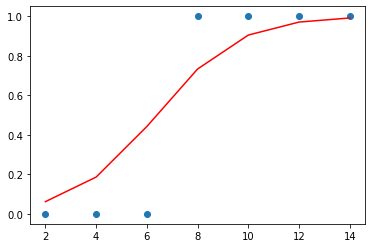

1/1 [==============================] - 0s 25ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.6%입니다.


In [49]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위해 'binary_crossentropy'로 설정합니다.
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

1/1 [==============================] - 0s 14ms/step


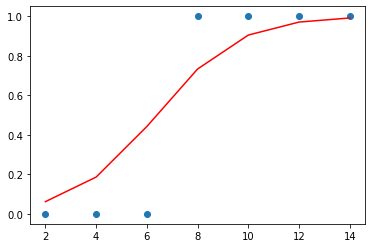

1/1 [==============================] - 0s 25ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.6%입니다.


In [50]:
# 그래프로 확인해 봅니다.
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.
hour = 7
prediction = model.predict([hour])
print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다." % (hour,
prediction * 100))

### 3. 퍼셉트론, 다층퍼셉트론 

<img src = 'https://thebook.io/img/080324/111_1.jpg' width= 600 height=200></img>

<img src = 'https://thebook.io/img/080324/111_2.jpg' width= 600 height=200></img>

<img src = 'https://thebook.io/img/080324/112_1.jpg' width= 600 height=200></img>

- 가중합(weighted sum)이란 입력 값과 가중치를 모두 곱한 후 바이어스를 더한 값을 의미합니다.

<img src = 'https://thebook.io/img/080324/113.jpg' width= 300 height=200></img>

- 퍼셉트론이나 아달라인은 모두 2차원 평면상에 직선만 가능.<br> 이 예시는 경우에 따라 선을 아무리 그어도 해결되지 않는 상황

### XOR 문제 (퍼셉트론의 한계)

![and](딥러닝/and.png)

<img src = 'https://thebook.io/img/080324/114.jpg' width= 600 height=200></img><br>
- 퍼셉트론으로는 문제 해결 불가 <br>
-다층 퍼셉트론(multilayer perceptron),오차 역전파(back propagation)로 문제 해결 

### 다층 퍼셉트론

<img src = 'https://thebook.io/img/080324/116_2.jpg'><br>
: 퍼셉트론 두 개를 한 번에 계산

<img src = 'https://thebook.io/img/080324/117_1.jpg'><br>
- 퍼셉트론 두 개를 각각 처리하는 은닉층(hidden layer)을 만들어서 처리
- 입력층(x1,x2) -> 은닉층(NAND,OR) -> 출력층(AND)

<img src = 'https://thebook.io/img/080324/118.jpg'><br>
- 은닉층(점선)
- x1,x2 입력값, 각 값에 가중치(w)곱하고 바이어스(b)더해 은닉층으로 전송
- 은닉층의 중간 정거장 = 노드(node)
- 은닉층에 취합된 값은 활성화 함수를 통해 다음으로 전송 <Br>
: 시그모이드 함수(σ(x))를 활성화 함수라고 하면 <Br>
    <img src = 'https://thebook.io/img/080324/fx-54.jpg'><br></br>

### 결과
<img src = 'https://thebook.io/img/080324/fx-55.jpg'>

#### 각각의 가중치(w)와 바이어스(b) 값 정하기

<img src = 'https://thebook.io/img/080324/fx-56.jpg'><br>
- W1 : 은닉층에서 사용하는 Weights 
- B2 : 은닉층에서 사용하는 Bias
- W2 : 은닉층에서 전송된 데이터를 결과로 만들기 위해 사용하는 Weights
- B2 : 은닉층에서 전송된 데이터를 결과로 만들기 위해 사용하는 Bias

In [57]:
# 만족하는 가중치와 바이어스의 조합은 많으나 뒤에서 구하는 방법 소개
# 지금은 값 지정해서 실행
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

# x1 값, x2 값을 번갈아 대입하며 최종 값 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값: " + str(x) + " 출력 값: " + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0


### 4. 오차 역전파, 활성화 함수, 경사하강법

<img src = 'https://thebook.io/img/080324/127.jpg'><br>


## 첫 번째 가중치 업데이트 공식 = (yo1- y실제 값) . yo1(1-yo1) . yh1

## 두 번째 가중치 업데이트 공식 = (𝛅yo1 . w31+ 𝛅yo2 . w41)yh1(1-yh1) . x1

: 두 식 모두 ‘out(1-out)’ 형태, 은닉층의 숫자가 늘어도 이러한 형태가 계속해서 나타나게 되므로, 이를 이용해 깊은 층의 계산, 깊은 층을 통해 학습할 수 있는 계기 딥러닝 시작

<img src='https://thebook.io/img/080324/128.jpg'></img><br>
- 기울기 소실 문제 발생

<img src='https://thebook.io/img/080324/129_1.jpg'><br>
-  시그모이드 함수 미분 최대치는 0.25, 1보다 작으므로 계속 곱하다 보면 0에 수렴.여러 층을 거칠수록 기울기가 사라져 가중치를 수정할 수 없다.

<img src='https://thebook.io/img/080324/129_2.jpg'><br>
- 시그모이드 함수의 문제점 보완위해 제안된 여러 함수

### 확률적 경사 하강법

 >  확률적 경사 하강법<br>
 : 전체 데이터를 사용하는 것이 아니라, 랜덤하게 추출한 일부 데이터만 사용하기 때문에 빠르고 더 자주 업데이트할 수 있다는 장점

> 모멘텀 확률적 경사 하강법(모멘텀 SGD) <br>
 :  경사 하강법과 마찬가지로 매번 기울기를 구하지만, 이를 통해 오차를 수정하기 전 바로 앞 수정 값과 방향(+, -)을 참고해 같은 방향으로 일정한 비율만 수정되게 하는 방법

<img src='https://thebook.io/img/080324/132.jpg'><br>
- 딥러닝에 사용되는 고급 경사 하강법의 변천 ( 옵티마이저 = 경사하강법)